# 설정

In [2]:
# 파이썬 ≥ 3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥ 0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "simple_classification_algorithm_training"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

이 장에서는 분류를 위한 초창기 머신 러닝 알고리즘인 퍼셉트론과 적응형 선형 뉴런 두 개를 사용한다. 파이썬으로 단계적으로 퍼셉트론을 구현하고 붓꽃 데이터셋에서 훈련하여 꽃 품종을 분류한다. 분류를 위한 머신 러닝 알고리즘 개념을 이해하고, 파이썬을 사용한 효율적인 구현 방법을 익히는 데 도움이 될 것이다.

적응형 선형 뉴런으로는 기본적인 최적화를 설명한다. 이는 후에 사이킷런의 강력한 분류 모델을 사용하는 기초를 다질 수 있을 것이다.

이 장에서는 다음 주제를 다룬다.
<ul>
    <li>머신 러닝 알고리즘을 직관적으로 이해하기</li>
    <li>판다스, 넘파이, 맷플롯립으로 데이터를 읽고 처리하고 시각화하기</li>
    <li>파이썬으로 선형 분류 알고리즘 구현하기</li>
</ul>

# 인공 뉴런: 초기 머신 러닝의 간단한 역사

<b>퍼셉트론</b><sup>perceptron</sup>과 이와 관련된 알고리즘을 자세히 설명하기 전에 초창기 머신 러닝을 간단히 둘러보자. AI를 설계하기 위해 생물학적 뇌가 동작하는 방식을 이해하려는 시도로, 1,943년 워런 맥컬록<sup>Warren McCulloch</sup>과 월터 피츠<sup>Walter Pitts</sup>는 처음으로 간소화된 뇌의 뉴런 개념을 발표했다.<sup id="a01">[1](#p01)</sup> 이를 <b>맥컬록-피츠</b><sup>MCP</sup> 뉴런이라고 하며 '최초의 인공 신공망'모델이다. 뉴런들은 뇌의 신경 세포와 서로 연결되어 있다. 이들은 다음 그림과 같이 화학적 · 전기적 신호를 처리하고 전달하는 데 관여한다.

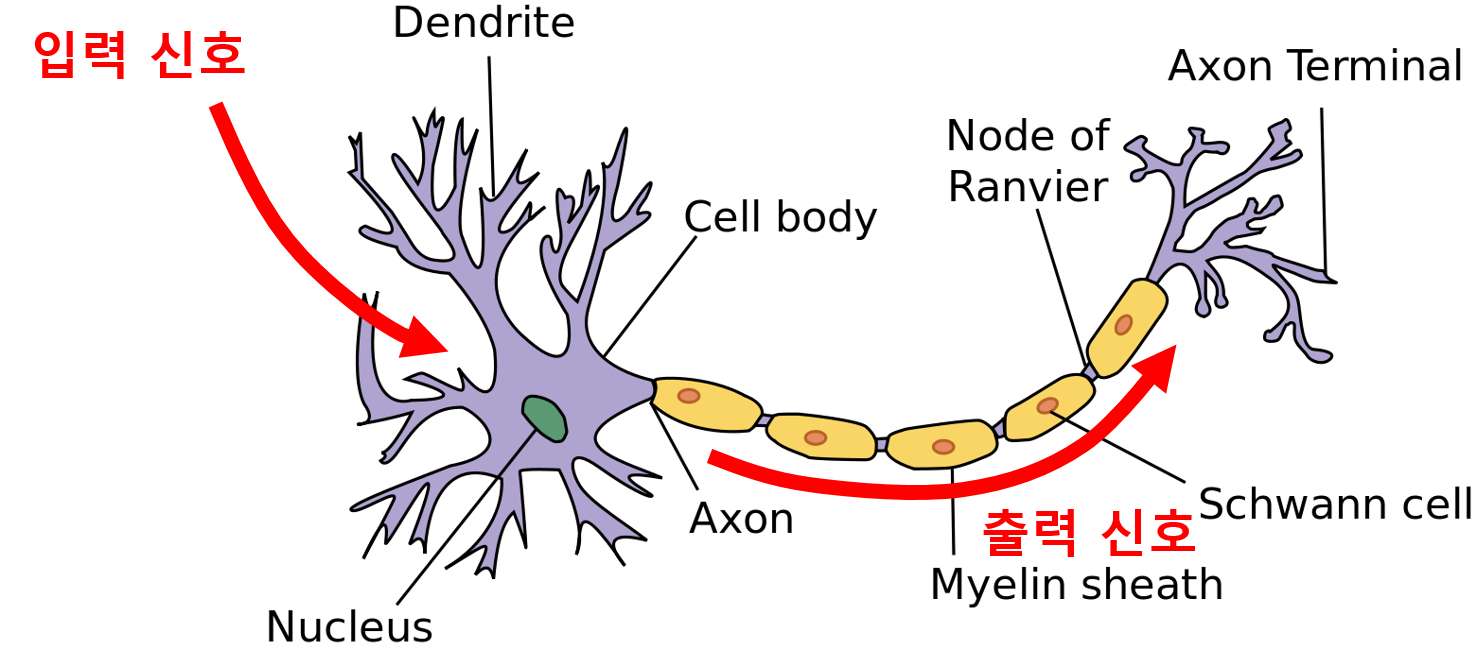

뉴런은 <b>수상 돌기</b><sup>Dendrite</sup>를 통해 신호를 전달받으며 받은 신호는 <b>세포체</b><sup>Cell body</sup>로 보낸다. 이때 여러 수상 돌기를 통해 들어온 신호가 세포체에 모이고, 신호가 특정 임계 값을 넘으면 세포체는 펄스 또는 스파이크 단위로 신호를 발생시킨다. 세포체가 신호를 발생시키는 과정을 <b>발화</b><sup>frigger</sup>라고 하며 발화된 신호는 <b>축삭</b><sup>Axon</sup>을 통해 다음 뉴런에 전달된다. 뉴런이 전기 신호를 전달하는 활동 전위 상태에 있으면 뉴런이 <b>활성화</b><sup>activation</sup>된 것이다.

맥컬록과 피츠는 신경 세포를 이진 출력을 내는 간단한 논리 회로로 표현했다. 신경 생리학자인 맥컬록은 인간의 신경계를 범용 계산 장치로 모델링할 수 있을지 궁금해했고 천재 수학자 피츠를 만나면서 생체 뉴런의 특성을 지니는 최초의 인공 신경망을 정의했다.

이들이 정의한 인공 신경망 모델은 활성 상태와 비활성 상태를 갖는 <b>이진 뉴런</b><sup>binary neuron</sup>으로 구성되며 생체 뉴런과 같이 시냅스의 흥분과 억제에 따라 신호가 전달되고 특정 임계치를 넘어야 신호가 발화한다.

맥컬론과 피츠는 이진 뉴런으로 구성된 신경망이 튜링 머신과 동등한 연산을 수행할 수 있음을 증명했다. 생체 신경망을 수학적으로 모델링했을 때 임의의 논리 연산과 산술 연산이 가능하다는 것을 보여줌으로써 인간의 두뇌가 잠재적으로 매우 강력한 연산 장치임을 증명하고자 했던 것이다. 이진 뉴런으로 구성된 신경망 모델은 AI의 창시자이자 현대 컴퓨터의 구조를 제시한 <b>폰 노이만</b><sup>John von Neumann</sup>에게도 큰 영향을 끼쳤으며 이런 점에서 맥컬록-피츠 모델은 학문적으로 중요하며 그 가치를 높게 평가받고 있다.

## 시냅스 가소성과 기억의 흔적

우리 몸에 새로운 자극이 들어오면 신호를 전달하는 뉴런의 시냅스에는 소포체와 수용체가 많지 않은 상태이기 때문에 신경 전달 물질도 적게 전달된다. 하지만 같은 자극이 반복되면 소포체와 수용체의 수가 점점 늘어나서 신경 전달 물질을 원활히 전달하는 구조로 변화한다. 이처럼 신호를 전달하는 뉴런이 자주 활성화될 때 신호 전달을 강화하기 위해 시냅스 구조가 변하는 성질을 시냅스 <b>가소성</b><sup>plasticity</sup>이라고 한다. 신호 전달이 강화되면 '뉴런이 연결되었다'고 말하며 변화된 시냅스 구조를 '기억의 흔적'이라고 부른다.

시냅스 가소성은 1,949년 캐나다의 신경 심리학자 도널드 헵<sup>Donald O. Hebb</sup>이 <b>헵의 학습 가설</b><sup>Hebbian learning</sup>로 발표했다. '지속해서 활성화되는 뉴런은 연결된다'라는 가설을 통해, 학습 과정에서 형성되는 장기 기억이 시냅스의 구조 변화와 연관되어 있음을 시사했다.

학계에서는 헵의 학습 가설을 바탕으로 시냅스 구조의 변화 과정을 '학습과 기억의 현상'으로 받아들이고 있다. 인간이 무언가 경험하거나 학습할 때는 신호가 발생하며, 이 신호가 신경망을 통해 전달되는 과정에서 기존 기억과 연합한다. 이때 새로운 신호가 연관된 기억을 만나면 연결이 추가되며 관련된 기억 간에 연결이 강화되기도 한다. 그에 따라 <b>신호와 관련된 뉴런의 가지는 굵어지고 연결은 많아지면서 장기 기억이 뇌에 자리 잡는 것</b>이다. 반대로 활성화되지 않은 뉴런은 연결이 약해진다. 이런 과정이 끊임없이 반복되면서 기억은 새롭게 만들어지거나 변화되고 확장되며 오래된 기억은 사라지다. 우리 뇌에는 1,000억 개의 뉴런이 있고 각 뉴런은 수천에서 수만 개의 시냅스 연결을 가진다. 기억을 새로 만들거나, 강화하거나 약화하기 위해 100조 개에 달하는 시냅스 연결이 끊임없이 변화한다. 인간의 뇌는 효율적인 구조로 기억을 관리하기 위해 시냅스의 연결 패턴과 강도를 매 순간 바꾸는 것이다.

## 학습하는 인공 신경망: 퍼셉트론

그러나 맥컬록-피츠 모델은 학습 과정이 없다 보니 문제에 따라 신경망의 구성도 매번 바꿔야 했다. 이런 단점을 해결하기 위해 프랑크 로젠블라트<sup>Frank Rosenblatt</sup>는 MCP 뉴런 모델과 헵의 학습 가설을 기반으로 인공 신경망이 스스로 문제에 맞춰 학습하는 모델인 퍼셉트론 학습 개념을 처음 발표했다.<sup id="a02">[2](#p02)</sup> 퍼셉트론 규칙에서 로젠블라트는 자동으로 최적의 가중치를 학습하는 알고리즘을 제안했다. 이 가중치는 뉴런의 출력 신호를 낼지 말지를 결정하기 위해 입력 특성에 곱하는 계수이다. 즉, 퍼셉트론의 학습 알고리즘은 새로운 입력에 대한 오차가 발생하면 뉴런의 연결 강도(가중치)를 조절하는 방식이다. 지도 학습의 분류 개념으로 말하면 이 알고리즘으로 샘플이 한 클래스에 속하는지 아닌지를 예측할 수 있다.

## 인공 뉴런의 수학적 정의

좀 더 형식적으로 말하면 <b>인공 뉴런</b><sup>artificial neuron</sup> 아이디어를 두 개의 클래스가 있는 <b>이진 분류</b><sup>binary classification</sup> 작업으로 볼 수 있다. 두 클래스는 간단하게 1을 양성 클래스<sup>positive class</sup>, -1을 음성 클래스<sup>negative class</sup>로 나타낸다. 그다음 입력 값 <i><strong>x</strong></i>와 이에 상응하는 가중치 벡터 <strong>w</strong>의 선형 조합으로 결정 함수(<i>Φ(z)</i>)를 정의한다. 최종 입력<sup>net input</sup>인 <i>z</i>는 <i>z = w<sub>1</sub>x<sub>1</sub> + ... + w<sub>m</sub>x<sub>m</sub>이다.

<div style="text-align : center;">
     <img src="./images/formula/ml04/w_x_feat.png">
</div>

이제 특정 샘플 <i><strong>x</strong><sup>(i)</sup></i> 의 최종 입력이 사전에 정의된 임계 값 <i>θ</i>보다 크면 클래스 1로 예측하고, 그렇지 않으면 클래스 -1로 예측한다. 퍼셉트론 알고리즘에서 결정 함수 <i>Φ(·)</i>는 <b>단위 계단 함수</b><sup>unit step function</sup><sup id="a03">[3](#p03)</sup>를 변형한 것이다.

<div style="text-align : center;">
     <img src="./images/formula/ml04/per_act_fun.png">
</div>

식을 간단하게 만들기 위해 임계 값 <i>θ</i>를 식의 왼쪽으로 옮겨 <i>w<sub>0</sub> = -θ</i>고 <i>x<sub>0</sub> = 1</i>인 0번째 가중치를 정의한다. 이렇게 하면 <i>z</i>를 좀 더 간단하게 쓸 수 있다.

<div style="text-align : center;">
     <img src="./images/formula/ml04/z_feat.png">
</div>

그리고 결정 함수는 다음과 같다.

<div style="text-align : center;">
     <img src="./images/formula/ml04/per_act_r_fun.png">
</div>

머신 러닝 분야에서는 음수 임계 값 또는 가중치 <i>w<sub>0</sub>=-θ</i>를 <b>절편</b>라고 한다. 다음 그림은 퍼셉트론 결정 함수로 최종 입력 z = <strong>w<sup>T</sup>x</strong>가 이진 출력(-1 또는 1)으로 압축되는 방법(왼쪽)과 이를 사용하여 선형 분리가 가능한 두 개의 클래스를 직선으로 분류하는 <b>선형 분류기</b><sup>linear classifier</sup>(오른쪽)를 보여준다. 입력 데이터와 가중치의 가중 합산 식은 두 클래스를 분류하는 <b>결정 경계</b><sup>decision boundary</sup>를 이룬다.

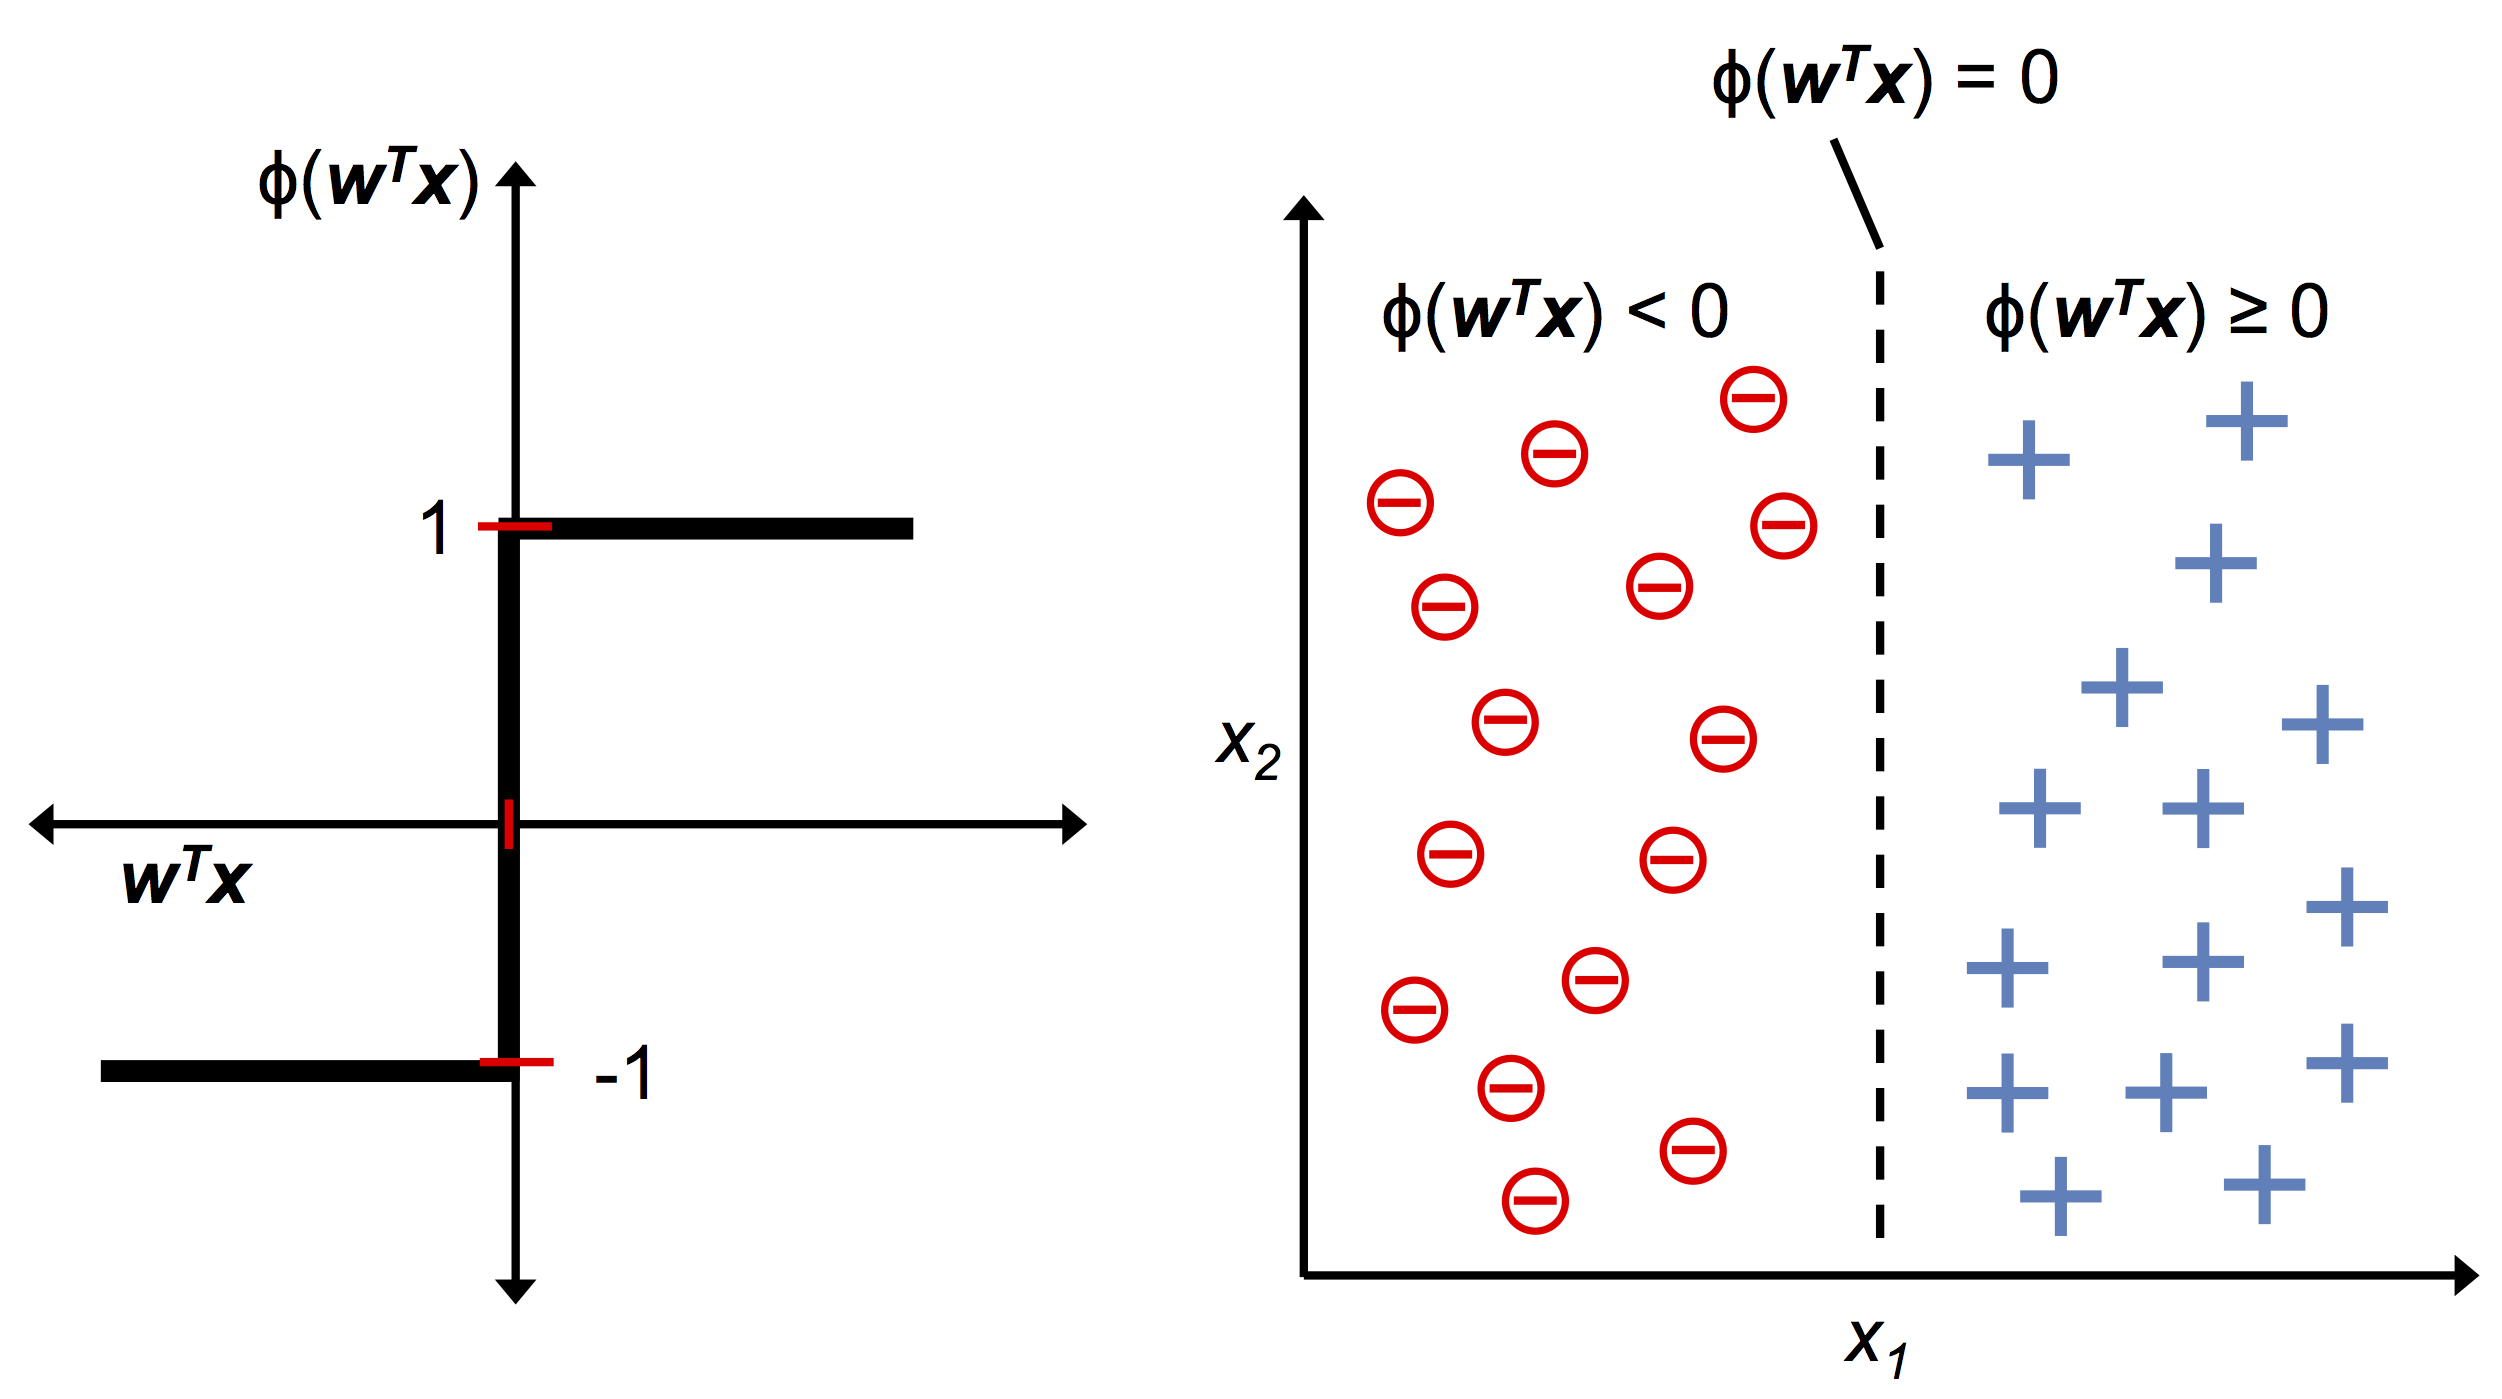

즉, 퍼셉트론의 가중 합산이 0인 <i>z = w<sub>0</sub>x<sub>0</sub> + ... + w<sub>m</sub>x<sub>m</sub></i> = 0 식은 결정 경계<sup id="a04">[4](#p04)</sup>를 이루는 직선의 방정식으로 가중치 벡터 <b>w</b>는 직선의 법선 벡터<sup>normal vector</sup>를, 편향 w<sub>0</sub>x<sub>0</sub>는 원점과 직선 사이의 거리를 나타낸다. 만일 편향이 0이면 직선이 항상 원점을 지나므로 임의의 위치에 있는 두 종류의 클래스를 완벽히 분류할 수 없다. 직선을 경계로 법선 벡터 방향에 있는 점들은 계단 함수의 실행 결과가 1이 되어 클래스 1로 분류되고, 법선 벡터의 반대 방향에 있는 점들은 계단 함수의 실행 결과가 0이 되어 클래스 -1로 분류된다.

### 생체 신경망을 모방하여 만든 퍼셉트론

퍼셉트론은 생체 신경망을 모방해서 만들었다. 그렇다면 퍼셉트론은 어떤 점에서 생체 신경망을 닮았다고 하는 것일까? 다음 그림을 보면 퍼셉트론이 데이터를 처리하는 과정과 생체 뉴런의 신호 전달 과정이 어떻게 대응되는지를 확인해 볼 수 있다.

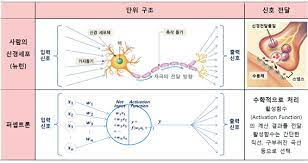

퍼셉트론이 데이터를 처리하는 과정과 생체 뉴런의 신호 전달 과정을 순서대로 대응해 보면 다음 표와 같이 정리할 수 있다.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-1wig{font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-d0ph{background-color:#9698ed;border-color:#000000;color:#000000;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-fymr{border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-d0ph" colspan="2">퍼셉트론</th>
    <th class="tg-d0ph">생체 신경망</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-fymr">입력</td>
      <td class="tg-c3ow"><i><b>x</b><sup>T</sup> = (x<sub>1</sub>, x<sub>2</sub>, ..., x<sub>m</sub>)</td>
    <td class="tg-c3ow">이전 뉴런이 발화한 신호</td>
  </tr>
  <tr>
    <td class="tg-fymr">가중치</td>
    <td class="tg-c3ow"><i><b>w</b><sup>T</sup> = (w<sub>1</sub>, w<sub>2</sub>, ..., w<sub>m</sub>)</td>
    <td class="tg-c3ow">시냅스의 연결 강도</td>
  </tr>
  <tr>
    <td class="tg-fymr">입력 데이터와 가중치의 곱</td>
      <td class="tg-c3ow"><i>w<sub>i</sub>x<sub>i</sub>(i=1, 2, ..., m)</td>
    <td class="tg-c3ow">시냅스의 연결 강도에 따라 신호가 강해지거나 약해지는 과정</td>
  </tr>
  <tr>
    <td class="tg-fymr">가중 합산</td>
    <td class="tg-c3ow"><i>z = w<sub>0</sub>x<sub>0</sub> + ... + w<sub>m</sub>x<sub>m</sub></i></td>
    <td class="tg-c3ow">세포체에서 수상 돌기를 통해 들어온 신호를 모으는 과정</td>
  </tr>
  <tr>
    <td class="tg-fymr">활성 함수</td>
    <td class="tg-c3ow"><i>Φ(x)</i></td>
    <td class="tg-c3ow">세포체의 신호 발화 과정</td>
  </tr>
  <tr>
    <td class="tg-1wig">출력</td>
    <td class="tg-0lax"><i>Φ(z)</i></td>
    <td class="tg-0lax">축삭을 따라 시냅스로 전달되는 과정</td>
  </tr>
</tbody>
</table>

<ul>
    <li><b>퍼셉트론의 입력</b>은 생체 신경망에서 이전 뉴런에서 발화된 신호라고 할 수 있다.</li>
    <li><b>퍼셉트론의 가중치</b>는 생체 신경망에서 두 시냅스 사이의 연결 강도를 표현한다. 따라서 학습 과정에서 연결 강도는 변한다.</li>
    <li><b>퍼셉트론에서 입력 데이터와 가중치의 곱</b>은 생체 신경망에서 이전 뉴런에서 발화된 신호가 두 시냅스 사이의 연결 강도에 따라 강해지거나 약해져 전달되는 과정을 나타낸다.</li>
    <li><b>퍼셉트론의 가중 합산 과정</b>은 생체 뉴런에서 여러 수상 돌기를 통해 동시에 들어온 신호가 세포체에 모이는 과정과 같다.</li>
    <li><b>퍼셉트론에서 활성 함수의 실행</b>은 생체 뉴런에서 세포체에 모인 신호가 임계치를 넘었을 때 새로운 신호를 발화하는 과정에 해당한다.</li>
    <li><b>퍼셉트론의 출력</b>은 생체 뉴런의 세포체에서 발화한 신호가 축삭을 따라 시냅스로 전달되는 과정에 해당한다.</li>
</ul>

<u>쉽게 말해 퍼셉트론은 선형 함수를 통과한 값 <i>z</i>를 계단 함수로 보내 0보다 큰지, 작은지 검사하여 1과 -1로 분류하는 아주 간단한 알고리즘이다.</u>

## 퍼셉트론 학습 규칙

MCP 뉴런과 로젠블라트의 임계 퍼셉트론 모델 이면에 있는 전반적인 아이디어는 뇌의 뉴런 하나가 작동하는 방식을 흉내 내려는 <b>환원주의</b><sup>reductionism</sup><sup id="a05">[5](#p05)</sup> 접근 방식을 사용한 것이다. 즉, 출력을 내거나 내지 않는 두 가지 경우만 있다. 따라서 로젠블라트의 초기 퍼셉트론 학습 규칙은 매우 간단하다. 요약하면 다음 과정과 같다.

<ol>
    <li>가중치를 0 또는 랜덤한 작은 값으로 초기화한다.</li>
    <li>각 훈련 샘플 <i><b>x</b><sup>(i)</sup></i>에서 다음 작업을 한다.</li>
        <ol>
            <li>출력 값 y^를 계산한다.</li>
            <li>가중치를 업데이트한다.</li>
        </ol>
        </ol>

여기서 출력 값은 앞서 정의한 단위 계단 함수로 예측한 클래스 레이블이다. 가중치 벡터 <b>w</b>에 있는 개별 가중치 <i>w<sub>j</sub></i>가 동시에 업데이트 되는 것을 다음과 같이 쓸 수 있다.

<div style="text-align : center;">
     <img src="./images/formula/ml04/training_w.png">
</div>

가중치 <i>w<sub>j</sub></i>를 업데이트하는 데 사용되는 Δ<i>w<sub>j</sub></i> 값은 퍼셉트론 학습 규칙에 따라 계산된다.

<div style="text-align : center;">
     <img src="./images/formula/ml04/training_dw.png">
</div>

여기서 η는 <b>학습률</b><sup>learning rate</sup>이다(일반적으로 0.0에서 1.0 사이 실수이다). <i>y<sup>(i)</sup></i>는 i번째 훈련 샘플의 <b>진짜 클래스 레이블</b><sup>true class label</sup>이다. <i>y^<sup>(i)</sup></i>는 <b>예측 클래스 레이블</b><sup>predict class label</sup>이다. <u>가중치 벡터의 모든 가중치를 동시에 업데이트한다는 점이 중요하다.</u> 즉, 모든 가중치 Δ<i>w<sub>j</sub></i>를 업데이트하기 전에 <i>y^<sup>(i)</sup></i>를 다시 계산하지 않는다. 구체적으로 2차원 데이터셋에서는 다음과 같이 업데이트된다.

<div style="text-align : center;">
     <img src="./images/formula/ml04/ex_training_w.png">
</div>

파이썬으로 퍼셉트론 규칙을 구현하기 전에 간단한 사고 실험을 하여 이 규칙이 얼마나 멋지고 간단하게 작동하는지 알아보자. 퍼셉트론이 클래스 레이블을 정확히 예측한 두 경우는 가중치가 변경되지 않고 그대로 유지된다.

<div style="text-align : center;">
     <img src="./images/formula/ml04/training_dw_01.png">
</div>

잘못 예측했을 때는 가중치를 양성 또는 음성 타깃 클래스 방향으로 이동시킨다.

<div style="text-align : center;">
     <img src="./images/formula/ml04/training_dw_02.png">
</div>

곱셈 계수인 <i>x<sub>j</sub><sup>(i)</sup></i>를 좀 더 잘 이해하기 위해 다른 예를 살펴보자.

<div style="text-align : center;">
     <img src="./images/formula/ml04/training_dw_03.png">
</div>

<i>x<sub>j</sub><sup>(i)</sup></i> = 0.5 일 때 이 샘플을 -1로 잘못 분류했다고 가정한다. 이때 가중치가 1만큼 추가되어 다음 번에 이 샘플을 만났을 때 최종 입력 <i>x<sub>j</sub><sup>(i)</sup></i> x <i>w<sub>j</sub><sup>(i)</sup></i> 가 더 큰 양수가 된다. 그러면 단위 계단 함수의 임계 값보다 커져 샘플이 +1로 분류될 가능성이 높아질 것이다.

<div style="text-align : center;">
     <img src="./images/formula/ml04/training_dw_04.png">
</div>

가중치 업데이트는 <i>x<sub>j</sub><sup>(i)</sup></i>에 비례한다. 예를 들어 다른 샘플 <i>x<sub>j</sub><sup>(i)</sup></i> = 2를 -1로 잘못 분류했다면 이 샘플을 다음번에 올바르게 분류하기 위해 더 크게 결정 경계를 움직인다.

<div style="text-align : center;">
     <img src="./images/formula/ml04/training_dw_05.png">
</div>

퍼셉트론은 두 클래스가 선형적으로 구분되고 학습률이 충분히 작을 때만 수렴이 보장된다. 두 클래스를 선형 결정 경계로 나눌 수 없다면 훈련 데이터셋을 반복할 최대 횟수(<b>에포크</b><sup>epoch</sup>)를 지정하고 분류 허용 오차를 지정할 수 있다. 그렇지 않으면 퍼셉트론은 가중치 업데이트를 멈추지 않는다.

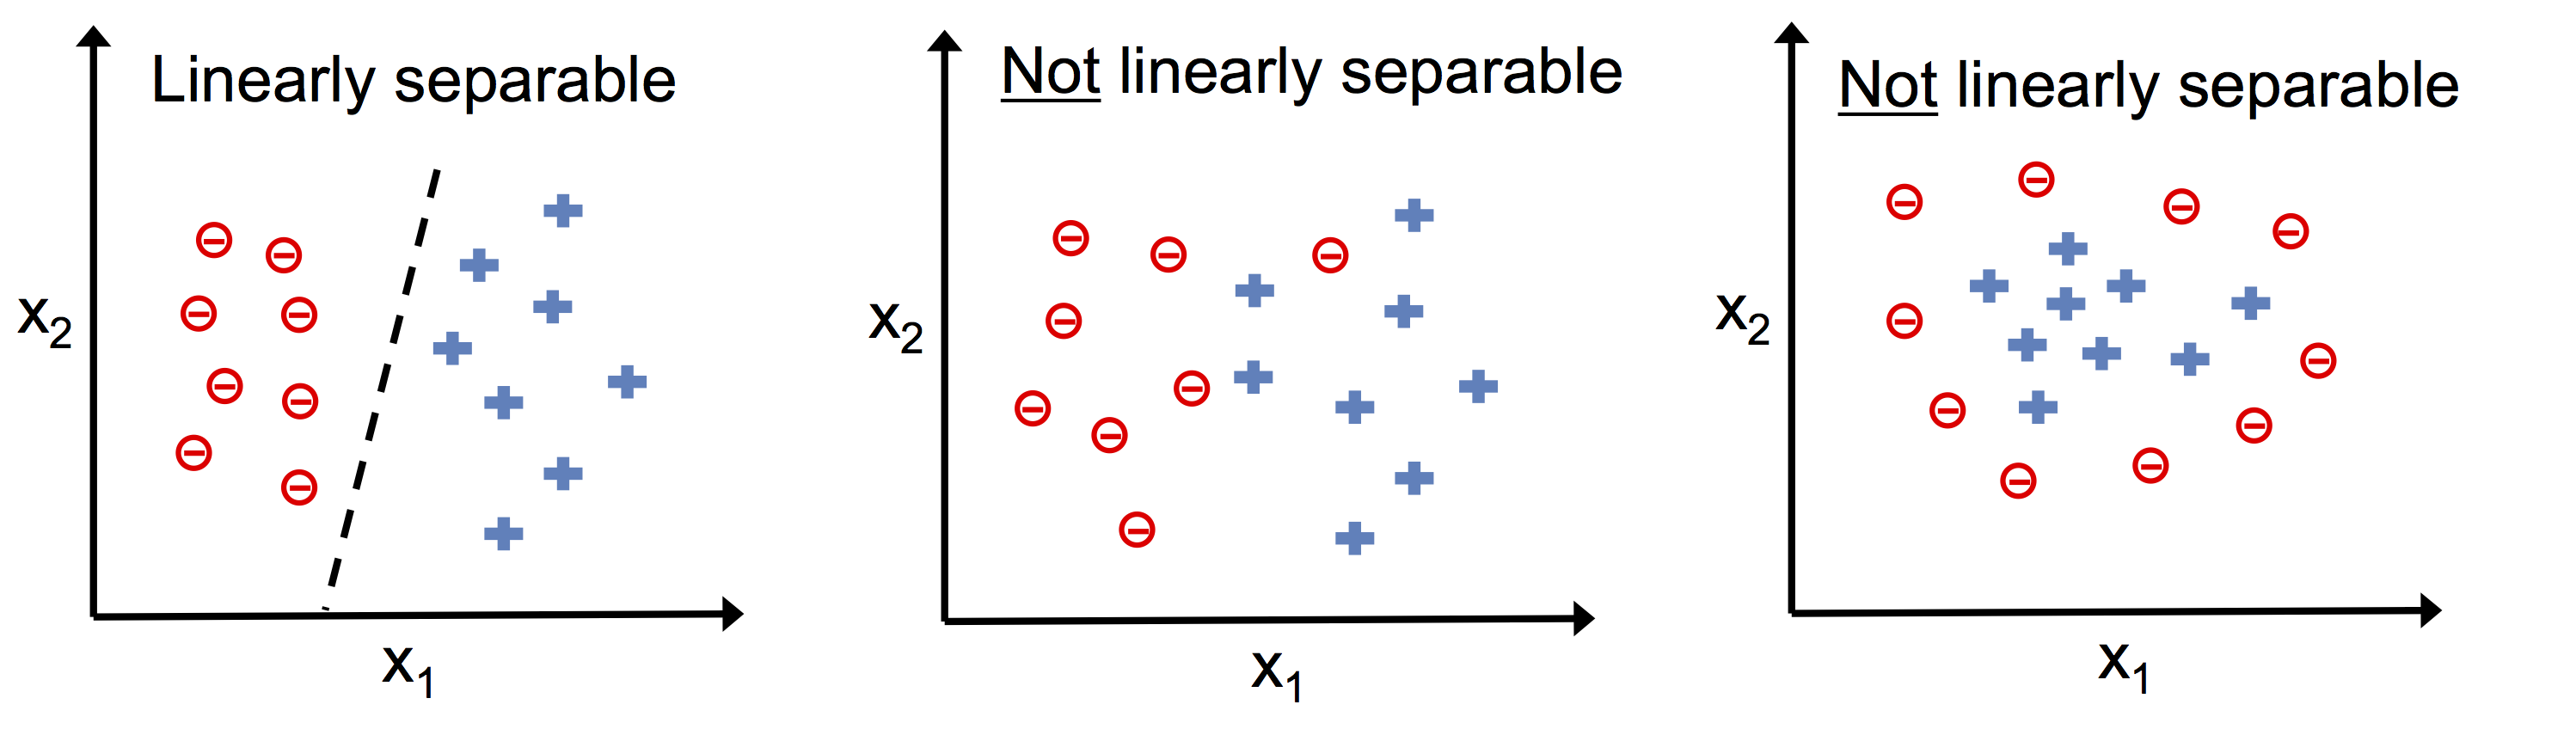

다음 절에서 실제로 구현하기 전에 퍼셉트론의 일반적인 개념을 간단한 다이어그램으료 요약해보자.

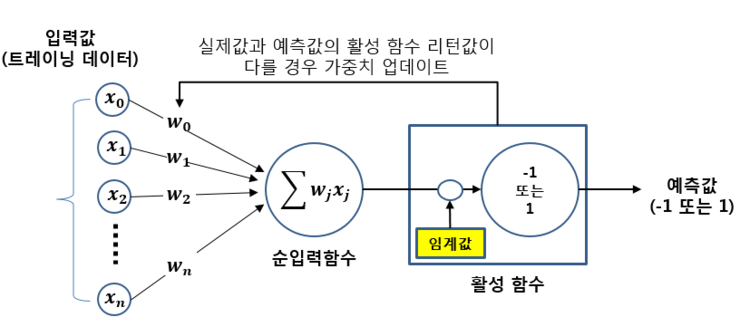

위 그림은 퍼셉트론이 샘플 <i><b>x</b></i>를 입력으로 받아 가중치 <i><b>w</b></i>를 연결하여 최종 입력을 계산하는 방법을 보여준다. 그다음 최종 입력은 활성 함수로 전달되어 샘플의 예측 클래스 레이블인 -1 또는 +1의 이진 출력을 만든다. 학습 단계에서 이 출력을 사용하여 예측 오차를 계산하고 가중치를 업데이트한다.

# 파이썬으로 퍼셉트론 학습 알고리즘 구현

이전 절에서 로젠블라트의 퍼셉트론 규칙이 어떻게 작동하는지 배웠다. 이제 파이썬으로 구현해보자.

## 객체 지향 퍼셉트론 API

객체 지향 방식을 사용하여 퍼셉트론 인터페이스를 가진 파이썬 클래스를 정의하겠다. Perceptron 객체를 초기화한 후 <code>fit()</code> 메서드로 데이터에서 학습하고, 별도의 <code>predict()</code> 메서드로 예측을 만든다. 관례에 따라 객체의 초기화 과정에서 생성하지 않고 다른 메서드를 호출하여 만든 속성은 밑줄(\_)을 추가한다(예를 들어 self.w_와 같다).

퍼셉트론 구현은 다음과 같다.

In [26]:
import numpy as np

class Perceptron(object):
    """퍼셉트론 분류기
    
    매개변수
    ----------
    eta: float
        학습률 (0.0과 1.0 사이)
    n_iter: int
        훈련 데이터셋 반복 횟수
    random_state: int
        가중치 무작위 초기화를 위한 난수 생성기 시드
        
    속성
    ----------
    w_: 1d-array
        학습된 가중치
    errors_: list
        에포크마다 누적된 분류 오류
    
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """훈련 데이터 학습
        
        매개변수
        ---------
        X: {array-like}, shape = [n_samples, n_features]
            n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y: array-like, shape = [n_samples]
            타깃 값
            
        반환값
        -------
        self: object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size=1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

이 퍼셉트론 구현을 사용하여 학습률 eta와 에포크 횟수(훈련 데이터를 반복하는 횟수) n_iter로 새로운 Perceptron 객체를 초기화한다. <code>fit()</code> 메서드에서 self.w_ 가중치를 벡터 R<sup>m+1</sup>로 초기화한다. 여기서 <i>m</i>는 데이터셋에 있는 차원(특성) 개수이다. 벡터의 첫 번째 원소인 절편을 위해 1을 더했다. 즉, 이 벡터의 첫 번째 원소 self.w_[0]는 앞서 언급한 절편이다.

이 벡터는 <code>rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])</code>을 사용하여 표준 편차가 0.01인 정규 분포에서 추출한 랜덤한 작은 수를 담고 있다. 여기서 rgen은 넘파이 난수<sup>random number</sup> 생성기로 사용자가 지정한 랜덤 시드<sup>seed</sup>로 이전과 동일한 결과를 재현할 수 있다.

가중치를 0으로 초기화하지 않은 이유는 가중치가 0이 아니어야 학습률 <i>η</i><sup>eta</sup>가 분류 결과에 영향을 주기 때문이다. 가중치가 0으로 초기화되어 있다면 학습률 파라미터 eta는 가중치 벡터의 방향이 아니라 크기에만 영향을 미친다. 즉, 벡터의 모든 원소가 0이 되는 것을 피하기 위해 랜덤한 작은 값을 얻기만 하면 된다(추가로, 균등 분포가 아니라 정규 분포를 사용하고 표준 편차 0.01을 선택한 것에는 특별한 이유는 없다).

<code>fit()</code>메서드는 가중치를 초기화한 후 훈련 세트에 있는 모든 개개의 샘플을 반복 순회하면서 이전 절에서 설명한 퍼셉트론 학습 규칙에 따라 가중치를 업데이트한다. 클래스 레이블은 <code>predict()</code>메서드에서 예측한다. <code>fit()</code>메서드에서 가중치를 업데이트하기 위해 <code>predict()</code>메서드를 호출하여 클래스 레이블에 대한 예측을 얻는다. <code>predict()</code>메서드는 모델이 학습되고 난 후 새로운 데이터의 클래스 레이블을 예측하는 데도 사용할 수 있다. 에포크마다 self.errors\_ 리스트에 잘못 분류된 횟수를 기록한다. 나중에 훈련하는 동안 얼마나 퍼셉트론을 잘 수행했는지 분석할 수 있다. <code>net_input()</code>메서드에서 사용한 <code>np.dot()</code>함수는 벡터 점곱 <b><i>w<sup>T</sup>x</i></b>를 계산한다.

<div style="background-color:#D3D3D3; padding:10px;">
    <span style="color: #D0B134"><strong>NOTEΞ</strong></span> a.dot(b)나 np.dot(a, b)처럼 넘파이를 사용하여 배열 a와 b 사이의 벡터 점곱을 계산하는 대신 파이썬만 사용하여 sum([i * j for i, j in zip(a,b)])처럼 계산할 수도 있다. 순수한 파이썬의 for 반복문 대신 넘파이를 사용하는 이점은 산술 연산을 벡터화하는 것이다. <b>벡터화</b><sup>vectorization</sup>는 원소별 산술 연산이 자동으로 배열의 모든 원소에 적용된다는 것을 의미한다. 한 번에 원소 하나씩 연산을 차례로 수행하는 것이 아니라 하나의 산술 연산을 배열에 대한 연속적인 명령으로 구성하면 <b>SIMD</b><sup>Single Instruction, Multiple Data</sup>를 지원하는 최신 CPU 구조의 장점을 잘 활용할 수 있다. 넘파이는 C 또는 포트란으로 쓴 <b>BLAS</b><sup>Basic Linear Algebra Subprograms</sup>와 <b>LAPACK</b><sup>Linear Algebra PACKage</sup> 같은 고도로 최적화된 선형대수 라이브러리를 사용한다. 넘파이를 사용하면 벡터와 행렬의 점곱 같은 기초적인 선형대수학을 사용하여 간결하고 직관적으로 코드를 작성할 수 있다. 
</div>

## 붓꽃 데이터셋에서 퍼셉트론 훈련

앞서 만든 퍼셉트론 구현을 테스트하기 위해 붓꽃 데이터셋에서 Setosa와 Versicolor 두 개의 클래스만 사용한다. 퍼셉트론 규칙이 2차원에 국한된 것은 아니지만 시각화를 하려고 꽃받침 길이와 꽃잎 길이만 고려한다. 두 개의 꽃 Setosa와 Versicolor만 사용하여 예제를 만들지만 퍼셉트론 알고리즘은 다중 클래스 분류로 확장할 수 있다. 예를 들어 <b>일대다</b><sup>One-versus-All, OvA</sup> 전략을 사용한다.

<div style="background-color:#D3D3D3; padding:10px;">
    <span style="color: #D0B134"><strong>NOTEΞ</strong></span> 이따금 <b>OvR</b><sup>One-versus-Rest</sup>이라고도 하는 <b>OvA</b> 기법을 사용하면 이진 분류기를 다중 클래스 문제에 적용할 수 있다. OvA를 사용할 때 클래스마다 하나의 분류기를 훈련한다. 각 클래스는 양성 클래스로 취급되고 다른 클래스의 샘플은 모두 음성 클래스로 생각한다. 새로운 데이터 샘플을 분류할 때는 클래스 레이블의 개수와 같은 n개의 분류기를 사용한다. 그후 신뢰도(확률)가 가장 높은 클래스 레이블을 샘플에 할당한다. 퍼셉트론은 OvA를 사용하여 최종 입력의 절댓값이 가장 큰 클래스를 레이블로 선택한다.
</div>

먼저 pandas 라이브러리를 사용하여 UCI 머신 러닝 저장소에서 붓꽃 데이터셋을 DataFrame 객체로 직접 로드<sup>load</sup>하겠다. 데이터가 제대로 로드되었는지 확인하기 위해 <code>tail()</code>메서드로 마지막 다섯 줄을 출력해 본다.

In [27]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases/iris/iris.data',
                 header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


그다음 50개의 Iris-setosa와 50개의 Iris-versicolor 꽃에 해당하는 처음 100개의 클래스 레이블을 추출한다.<sup id="a06">[6](#p06)</sup> 클래스 레이블을 두 개의 정수 클래스 1(versicolor)과 -1(setosa)로 바꾼 후 벡터 y에 저장한다. 판다스 DataFrame의 <code>values()</code>메서드는 넘파이 배열을 반환한다.

비슷하게 100개의 훈련 샘플에서 첫 번째 특성 열(꽃받침 길이)과 세 번째 특성 열(꽃잎 길이)을 추출하여 특성 행렬 X에 저장한다. 2차원 산점도<sup>scatter plot</sup>로 시각화해보자.

그림 저장: Iris_scatter


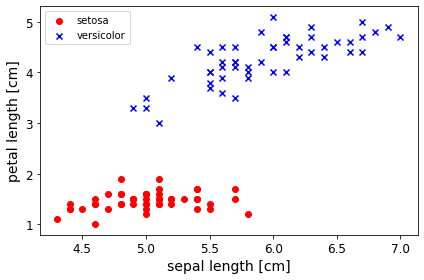

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# setosa와 versicolor를 선택
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# 꽃받침 길이와 꽃잎 길이를 추출
X = df.iloc[0:100, [0, 2]].values

# 산점도 시각화
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
           color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
save_fig('Iris_scatter')
plt.show()

이 산점도는 붓꽃 데이터셋에 있는 샘플들이 꽃받침 길이와 꽃잎 길이 두 개의 특성 축을 따라 분포된 형태를 보여 준다. 이런 2차원 부분 공간에서는 선형 결정 경계로 Setosa와 Versicolor 꽃을 구분하기 충분할 것 같다. 퍼셉트론 같은 선형 분류기가 이 데이터셋의 꽃을 완벽하게 분류할 것이다.

이제 붓꽃 데이터셋에서 추출한 일부 데이터에서 퍼셉트론 알고리즘을 훈련해 보자. 에포크 대비 잘못 분류된 오차를 그래프로 그려서, 알고리즘이 수렴하여 두 붓꽃 클래스를 구분하는 결정 경계를 찾는지 확인하겠다.

그림 저장: ppn_epoch_error


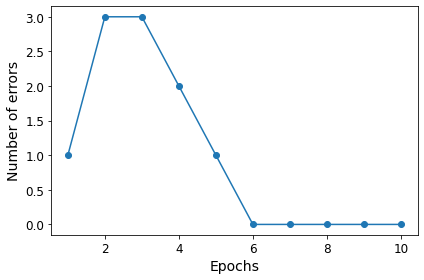

In [29]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1),
         ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')
save_fig('ppn_epoch_error')
plt.show()

위 그림에서 볼 수 있듯이 퍼셉트론은 여섯 번째 에포크 이후에 수렴했고 훈련 샘플을 완벽하게 분류했다. 이제 간단한 함수를 만들어 2차원 데이터셋의 결정 경계를 시각화해 보자.

In [34]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 마커와 컬러맵을 설정합니다
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 샘플의 산점도를 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

먼저 colors와 markers를 정의하고 ListedColormap을 사용하여 colors 리스트에서 컬러맵을 만든다. 두 특성의 최솟값과 최댓값을 찾고 이 벡터로 넘파이 <code>meshgrid()</code>함수로 그리드<sup>grid</sup> 배열 xx1과 xx2 쌍을 만든다. 두 특성의 차원에서 퍼셉트론 분류기를 훈련했기 때문에 그리드 배열을 펼치고 훈련 데이터와 같은 개수의 열이 되도록 만든다. <code>predict()</code>메서드로 그리드 각 포인트에 대응하는 클래스 레이블 Z를 예측한다.

클래스 레이블 Z를 xx1, xx2 같은 차원의 그리드로 크기를 변경한 후 맷플롯립의 <code>contourf()</code>함수로 등고선 그래프를 그린다. 그리드 배열에 대해 예측한 클래스를 각기 다른 색깔로 매핑하여 결정 영역을 나타낸다.

C:\Users\Sangjin\AppData\Local\Temp\ipykernel_89640\3284501193.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


그림 저장: ppn_decision_regions


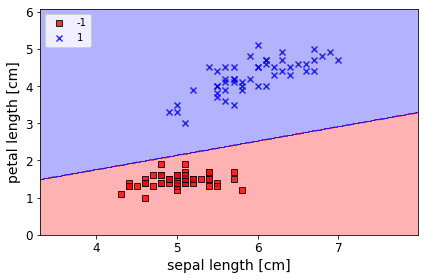

In [36]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
save_fig('ppn_decision_regions')
plt.show()

위 그림에서 볼 수 있듯이 퍼셉트론이 학습한 결정 경계는 두 개의 붓꽃으로 구성된 데이터셋의 모든 샘플을 완벽하게 분류한다.

<div style="background-color:#D3D3D3; padding:10px;">
    <span style="color: #D0B134"><strong>NOTEΞ</strong></span> 퍼셉트론이 두 개의 붓꽃 클래스를 완벽하게 분류했지만 퍼셉트론의 가장 큰 문제점은 수렴에 있다. 프랑크 로젠블라트는 퍼셉트론 학습 규칙이 두 개의 클래스가 선형적인 초평면으로 구분될 수 있을 때 수렴한다는 것을 수학적으로 증명했다. 선형 결정 경계로 완벽하게 클래스가 구분되지 않는다면 최대 에포크를 지정하지 않는한 가중치 업데이트 과정이 멈추지 않는다.
</div>

# 적응형 선형 뉴런과 학습의 수렴

이 절에서 단일층 신경망의 또 다른 종류인 <b>적응형 선형 뉴런</b><sup>ADAptive LInear NEuron, ADALINE</sup>을 살펴보겠다. 버나드 위드로우<sup>Bernard Widrow</sup>와 그의 박사 과정 학생인 테드 호프<sup>Tedd Hoff</sup>가 프랑크 로젠블라트의 퍼셉트론 알고리즘 이후 채 몇 년이 지나지 않아 <b>아달린</b><sup>Adaline</sup>을 발표했다.<sup id="a07">[7](#p07)</sup> 아달린은 퍼셉트론의 향상된 버전으로 볼 수 있다.

아달린은 연속 함수<sup>continuous function</sup>로 비용 함수를 정의하고 최소화하는 핵심 개념을 보여 주기 때문에 아주 흥미롭다. 후에 설명할 로지스틱 회귀<sup>logistic regression</sup>, 서포트 벡터 머신<sup>support vector machine</sup> 같은 분류를 위한 고급 머신 러닝 모델과 회귀 모델을 이해하는 데 도움이 될 것이다.

아달린 규칙(위드로우-호프 규칙이라고도 함)과 로젠블라트 퍼셉트론의 가장 큰 차이점은 가중치를 업데이트하는 데 퍼셉트론처럼 단위 계단 함수 대신 선형 활성화 함수를 사용하는 것이다.

아달린에서 선형 활성화 함수 <i>Φ(z)</i>는 최종 입력과 동일한 함수이다. 즉, 다음과 같다.

<div style="text-align : center;">
     <img src="./images/formula/ml04/Adaline_act.png">
</div>

선형 활성화 함수가 가중치 학습에 사용되지만 최종 예측을 만드는 데 여전히 임계 함수를 사용한다. 앞서 보았던 단위 계단 함수와 비슷하다. 퍼셉트론과 아달린 알고리즘의 주요 차이점을 다음 그림에 타나냈다.

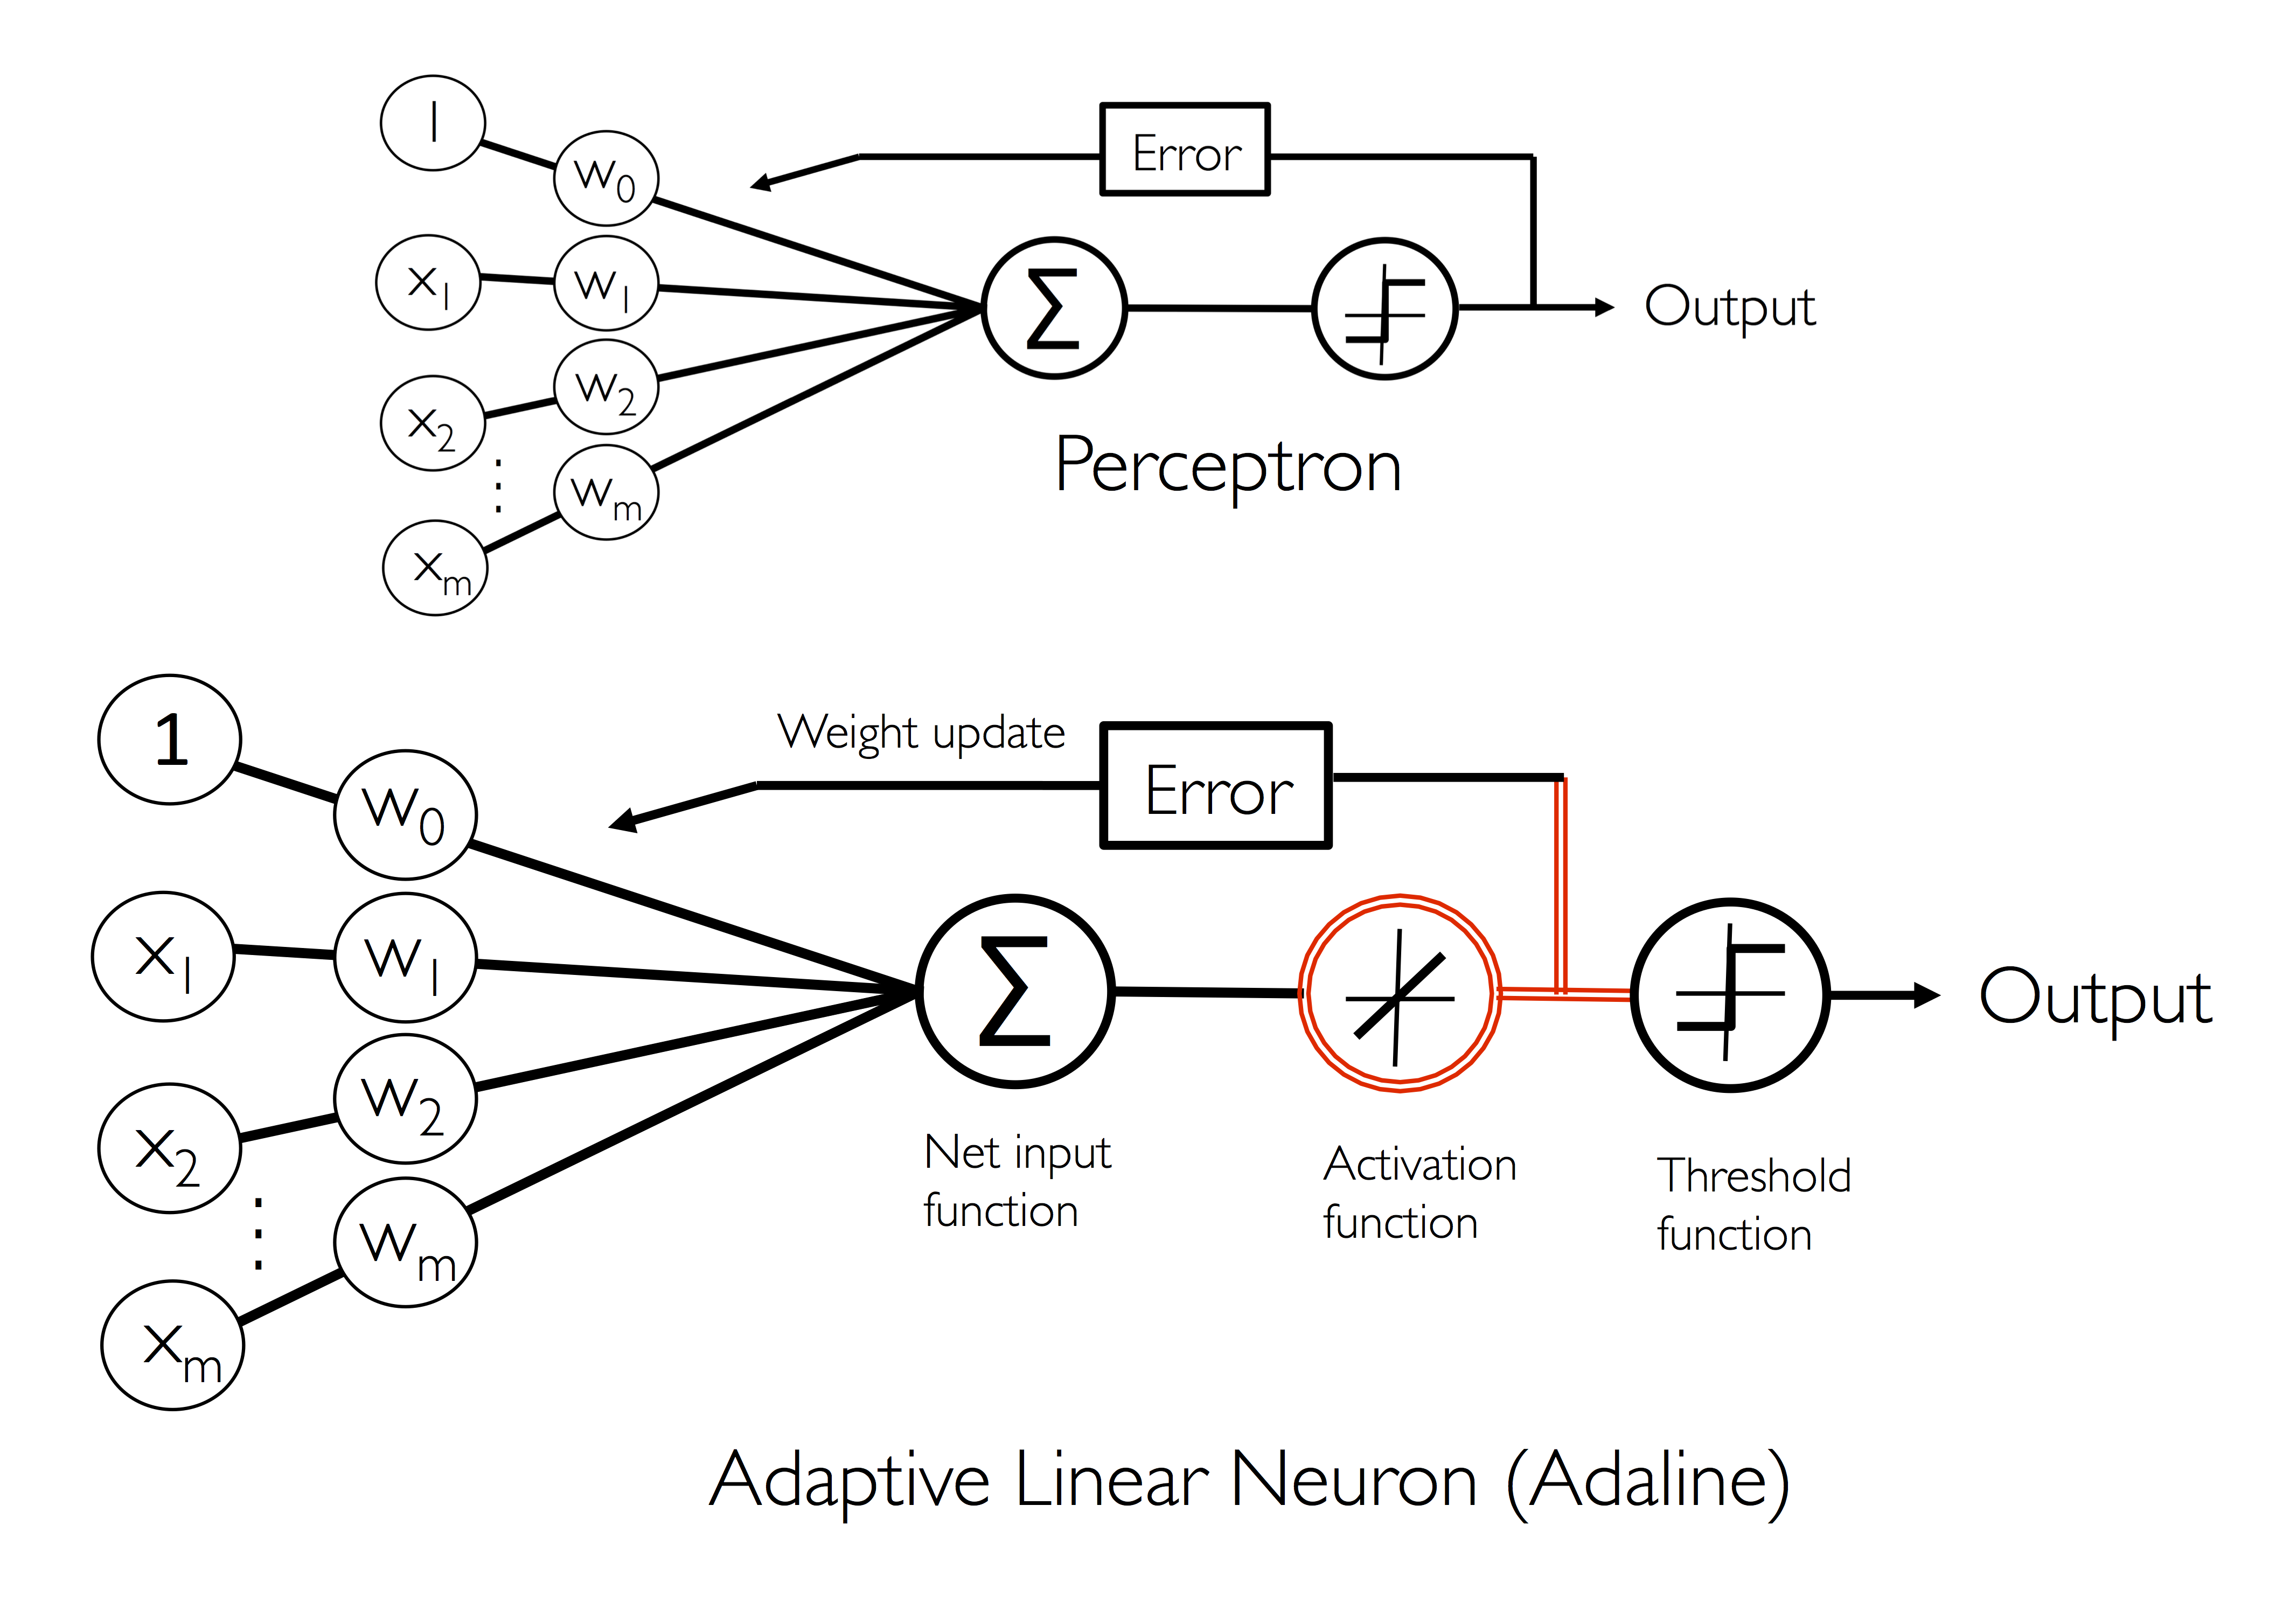

아달린 알고리즘은 진짜 클래스 레이블과 선형 활성화 함수의 실수 출력 값을 비교하여 모델의 오차를 계산하고 가중치를 업데이트한다. 반대로 퍼셉트론은 진짜 클래스 레이블과 예측 클래스 레이블을 비교한다.

## 경사 하강법으로 비용 함수 최소화

지도 학습 알고리즘의 핵심 구성 요소는 학습 과정 동안 최적화하기 위해 정의한 <b>목적 함수</b><sup>object function</sup>이다. 종종 최소화하려는 비용 함수는 목적 함수가 된다. 아달린은 계산된 출력과 진짜 클래스 레이블 사이의 <b>제곱 오차합</b><sup>Sum of Squared Errors, SSE</sup>으로 가중치를 학습할 비용 함수 <i>J</i>를 정의한다.

<div style="text-align : center;">
     <img src="./images/formula/ml04/Adaline_cost_func.png">
</div>

1/2 항은 다음 문단에서 설명할 그래디언트<sup>gradient</sup>를 간소하게 만들려고 편의상 추가한 것이다. 단위 계단 함수 대신 연속적인 선형 활성화 함수를 사용하는 장점은 비용 함수가 미분 가능해진다는 것이다. 이 비용 함수의 또 다른 장점은 볼록 함수라는 것이다. 간단하지만 강력한 최적화 알고리즘인 <b>경사 하강법</b><sup>gradient descent</sup>을 적용하여 붓꽃 데이터셋의 샘플을 분류하도록 비용 함수를 최소화하는 가중치를 찾을 수 있다.

다음 그림에서는 경사 하강법 이면에 있는 핵심 아이디어를 지역 또는 전역 최솟값에 도달할 때까지 언덕을 내려오는 것으로 묘사하고 있다. 각 반복에서 경사의 반대 방향으로 진행한다. 진행 크기는 경사의 기울기와 학습률로 결정한다.

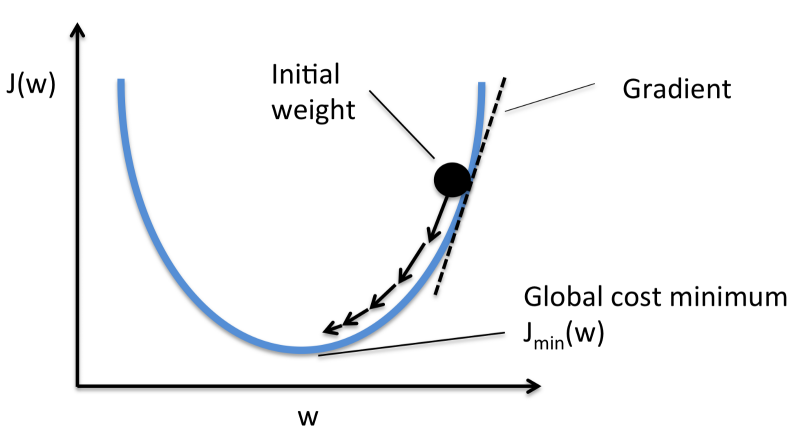

경사 하강법을 사용하면 비용 함수 <i>J(w)</i>의 그래디언트 ∇<i>J(w)</i> 반대 방향으로 조금씩 가중치를 업데이트한다.

<div style="text-align : center;">
     <img src="./images/formula/ml04/Ada_w.png">
</div>

가중치 변화량 Δ<i>w</i>는 음수의 그래디언트 학습률 <i>η</i>를 곱한 것으로 정의한다.

<div style="text-align : center;">
     <img src="./images/formula/ml04/Ada_w_01.png">
</div>

비용 함수의 그래디언트를 계산하려면 각 가중치 <i>w<sub>j</sub></i> 에 대한 편도 함수를 계산해야 한다.

<div style="text-align : center;">
     <img src="./images/formula/ml04/Ada_w_02.png">
</div>

따라서 가중치 <i>w<sub>j</sub></i>의 업데이트 공식을 다음과 같이 쓸 수 있다.

<div style="text-align : center;">
     <img src="./images/formula/ml04/Ada_w_03.png">
</div>

모든 가중치가 동시에 업데이트되기 때문에 아달린 학습 규칙은 다음과 같다.

<div style="text-align : center;">
     <img src="./images/formula/ml04/Ada_w.png">
</div>

아달린 학습 규칙이 퍼셉트론과 동일하게 보이지만 <i>z<sup>(i)</sup></i> = <b>w</b><sup>T</sup><b>x</b><sup>(i)</sup>인 <i>Φ(z<sup>(i)</sup>)</i>는 정수 클래스 레이블이 아니고 실수이다. 또 훈련 세트에 있는 모든 샘플을 기반으로 가중치 업데이트를 계산한다(각 샘플마다 업데이트하지는 않는다). 이 방식을 <b>배치 경사 하강법</b><sup>batch gradient descent</sup>이라고도 한다.

## 파이썬으로 아달린 구현

퍼셉트론 규칙과 아달린이 매우 비슷하기 때문에 앞서 정의한 퍼셉트론 구현에서 <code>fit()</code>메서드를 바꾸어 경사 하강법으로 비용 함수가 최소화되도록 가중치를 업데이트한다.

In [45]:
class AdalineGD(object):
    """적응형 선형 뉴런 분류기

    매개변수
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------
    w_ : 1d-array
      학습된 가중치
    cost_ : list
      에포크마다 누적된 비용 함수의 제곱합

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습

        매개변수
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          n_samples 개의 샘플과 n_features 개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃값

        반환값
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """선형 활성화 계산"""
        return X

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

퍼셉트론처럼 개별 훈련 샘플마다 평가한 후 가중치를 업데이트하지 않고 전체 훈련 데이터셋을 기반으로 그래디언트를 계산한다. 절편(0번째 가중치)은 <code>self.eta * errors.sum()</code>이고<sup id="a08">[8](#p08)</sup> 가중치 1에서 m까지는 <code>self.eta * X.T.dot(errors)</code>이다. 여기서 <code>X.T.dot(errors)</code>는 특성 행렬과 오차 벡터 가의 행렬-벡터 곱셈이다.

이 코드의 <code>activation()</code>메서드는 단순한 항등 함수<sup>identity function</sup>이기 때문에 아무런 영향을 미치지 않는다. 단일층 신경망을 통해 정보가 어떻게 흘러가는지를 표시하려고 (<code>activation()</code> 메서드에서 계산되는) 활성화 함수를 추가했다. 입력 데이터의 특성에서 최종 입력, 활성화, 출력 순으로 진행된다. 후에 다룰 비선형 활성화 함수를 사용하는 로지스틱 회귀 모델은 활성화 함수와 비용 함수만 다르고 아달린과 매우 비슷하다.

이전 퍼셉트론 구현과 마찬가지로 비용을 <code>self.cost_</code> 리스트에 모아서 알고리즘이 훈련으로 수렴하는지 확인해 보겠다.

실전에서는 최적으로 수렴하는 좋은 학습률 <i>η</i>를 찾기 위해 여러 번 실험을 해야 한다. 두 개의 학습률 <i>η</i>=0.1과 <i>η</i>=0.0001을 선택해 보자. 에포크 횟수 대비 비용 함수의 값을 그래프로 나타내면 아달린 구현이 훈련 데이터에서 얼마나 잘 학습하는지 볼 수 있다.

<div style="background-color:#D3D3D3; padding:10px;">
    <span style="color: #D0B134"><strong>NOTEΞ</strong></span> 에포크 횟수(n_iter)와 학습률 <i>η</i>(eta)는 퍼셉트론과 아달린 학습 알고리즘의 하이퍼파라미터이다. 나중에는 모델이 최적의 성능을 내기 위해 다양한 하이퍼파라미터 값을 자동으로 찾을 것이다.
</div>

두 학습률에서 에포크 횟수 대비 비용 그래프를 그려 본다.

그림 저장: ada_converage_by_eta


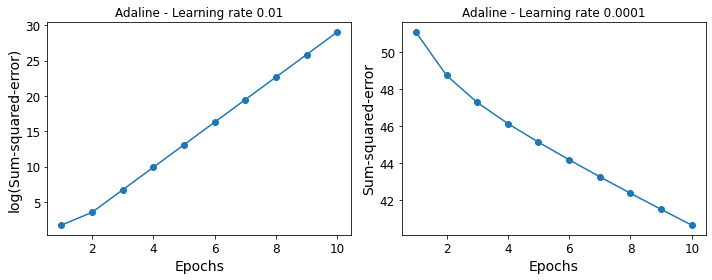

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1= AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1),
           np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1),
           ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
save_fig('ada_converage_by_eta')
plt.show()

출력된 비용 함수 그래프에서 볼 수 있듯이 두 개의 다른 문제가 발생했다. 위 그림의 왼쪽 그래프는 학습률이 너무 클 때 발생한다. 비용 함수를 최소화하지 못하고 오차는 에포크마다 점점 더 커진다. 전역 최솟값을 지나쳤기 때문이다. 반면 오른쪽 그래프에서는 비용이 감소하지만 학습률 <i>η</i>=0.0001은 너무 작기 때문에 알고리즘이 전역 최솟값에 수렴하려면 아주 많은 에포크가 필요하다.

다음 그림은 비용 함수 J를 최소화하려고 특정 가중치 값을 바꾸었을 때 어떤 일이 일어나는지 보여 준다. 왼쪽 그림은 적절하게 선택한 학습률의 경우이다. 비용이 점차 감소하여 전역 최솟값의 방향으로 이동한다. 오른쪽 그림은 너무 큰 학습률을 선택하여 전역 최솟값을 지나쳤다.

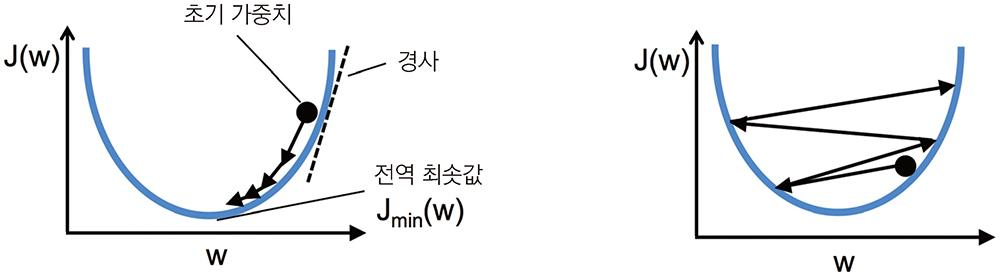

## 특성 스케일을 조정하여 경사 하강법 결과 향상

일부 머신 러닝 알고리즘들(트리 기반 알고리즘)을 제외한 대부분은 최적의 성능을 위해 어떤 식으로든지 특성 스케일을 조정하는 것이 필요하다.

경사 하강법은 특성 스케일을 조정하여 혜택을 볼 수 있는 많은 알고리즘 중 하나다. 이 절에서는 <b>표준화</b><sup>standardization</sup>라고 하는 특성 스케일 방법을 사용하겠다. 데이터에 표준 정규 분포의 성질을 부여하여 경사 하강법 학습이 좀 더 빠르게 수렴되도록 돕는다. 표준화는 각 특성의 평균을 0에 맞추고 특성의 표준 편차를 1로 만든다. 예를 들어 <i>j</i>번째 특성을 표준화하려면 모든 샘플에서 평균 <i>μ<sub>j</sub></i>를 빼고 표준 편차 <i>σ<sub>j</sub></i>로 나누면 된다.

<div style="text-align : center;">
     <img src="./images/formula/ml04/standardization.png">
</div>

여기서 <i><b>x</b><sub>j</sub></i>는 n개의 모든 훈련 샘플에서 j번째 특성 값을 포함한 벡터이다. 표준화 기법을 데이터셋의 각 특성 j에 적용한다. 표준화가 경사 하강법 학습에 도움이 되는 이유 중 하나는 다음 그림에 나온 것처럼 더 적은 단계를 거쳐 최적 혹은 좋은 솔루션을 찾기 때문이다. 다음 그림은 2차원 분류 문제에서 모델의 가중치에 따른 비용 함수의 등고선을 보여 준다.

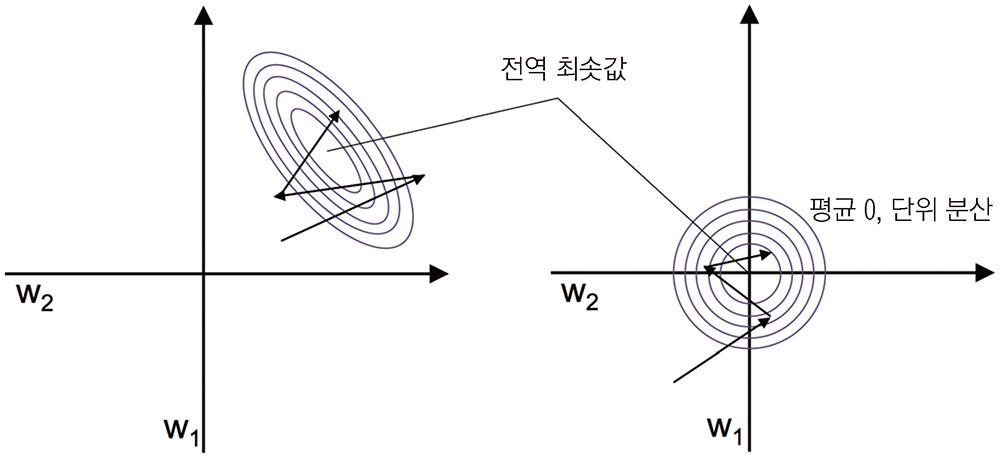

표준화는 넘파이 내장 함수 <code>mean()</code>과 <code>std()</code>로 간단하게 처리할 수 있다.

In [47]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

표준화한 후 다시 아달린 모델을 훈련하고 학습률 <i>η</i>=0.01에서 몇 번의 에포크만에 수렴하는지 확인해 보겠다.

C:\Users\Sangjin\AppData\Local\Temp\ipykernel_89640\3284501193.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


그림 저장: ada_decision_regions


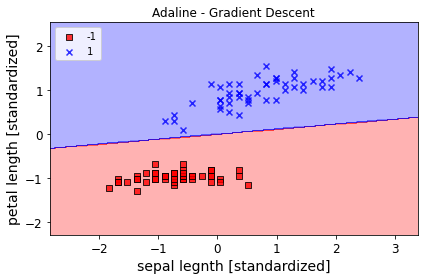

그림 저장: ada_learning_curve


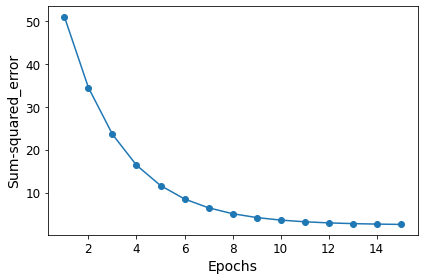

In [50]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal legnth [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
save_fig('ada_decision_regions')
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared_error')
save_fig('ada_learning_curve')
plt.show()

이 그래프에서 볼 수 있듯이 학습률 <i>η</i>=0.01을 사용하고 표준화된 특성에서 훈련하니 아달린 모델이 수렴했다. 모든 샘플이 완벽하게 분류되더라도 SSE가 0이 되지는 않는다.

특성 스케일에 대한 추가적인 내용은 다음 링크에서 <b>특성 스케일링</b>부분을 참고하자.<br><a href='https://github.com/Sameta-cani/jwork/blob/master/ml03.ipynb' target='blank'>https://github.com/Sameta-cani/jwork/blob/master/ml03.ipynb</a>

## 대규모 머신 러닝과 확률적 경사 하강법

이전 절에서 전체 훈련 세트에서 계산한 그래디언트의 반대 방향으로 한 걸음씩 진행하여 비용 함수를 최소화하는 방법을 배웠다. 이 방식을 이따금 <b>배치 경사 하강법</b>이라고도 부른다. 수백만 개의 데이터 포인트가 있는 매우 큰 데이터셋을 생각해 보자. 많은 머신 러닝 애플리케이션에서 이런 데이터셋은 드문 일이 아니다. 이때 배치 경사 하강법을 실행하면 계산 비용이 매우 많이 든다. 전역 최솟값으로 나아가는 단계마다 매번 전체 훈련 데이터셋을 다시 평가해야 하기 때문이다.

<b>확률적 경사 하강법</b><sup>stochastic gradient descent</sup>은 배치 경사 하강법의 다른 대안으로 인기가 높다. 이따금 반복 또는 온라인 경사 하강법이라고 부른다. 다음 첫 번째 수식처럼 모든 샘플 <i><b>x</b><sup>(i)</sup></i>에 대하여 누적된 오차의 합을 기반으로 가중치를 업데이트하는 대신 두 번째 수식처럼 각 훈련 샘플에 대해서 조금씩 가중치를 업데이트한다.

<div style="text-align : center;">
     <img src="./images/formula/ml04/sgd_training_w.png">
</div>

확률적 경사 하강법을 경사 하강법의 근사로 생각할 수 있지만 가중치가 더 자주 업데이트되기 때문에 수렴 속도가 훨씬 빠르다. 그래디언트가 하나의 훈련 샘플을 기반으로 계산되므로 오차의 궤적은 배치 경사 하강법보다 훨씬 어지럽다. 비선형 비용 함수를 다룰 때 얕은 지역 최솟값을 더 쉽게 탈출할 수 있어 장점이 되기도 한다. 확률적 경사 하강법에서 만족스러운 결과를 얻으려면 훈련 샘플 순서를 무작위하게 주입하는 것이 중요하다. 또 순환되지 않도록 에포크마다 훈련 세트를 섞는 것이 좋다.

<div style="background-color:#D3D3D3; padding:10px;">
    <span style="color: #D0B134"><strong>NOTEΞ</strong></span> 확률적 경사 하강법 구현에서 종종 고정된 학습률 <i>η</i>를 시간이 지남에 따라 적응적인 학습률로 대체한다. 예를 들어 다음과 같다.<br><br>
    <div style="text-align : center;">
     <img src="./images/formula/ml04/sgd_learning_rate.png">
</div>
    <br>여기서 <i>c</i><sub>1</sub>과 <i>c</i><sub>2</sub>는 상수다. 확률적 경사 하강법은 전역 최솟값에 도달하지 못하지만 매우 가까운 지역에 근접한다. 적응적 학습률을 사용하면 최솟값에 더욱 가깝게 다가갈 수 있다.
</div>

확률적 경사 하강법의 또 다른 장점은 <b>온라인 학습</b><sup>online learning</sup>으로 사용할 수 있다는 것이다. 온라인 학습에서 모델은 새로운 훈련 데이터가 도착하는 대로 훈련된다. 많은 양의 훈련 데이터가 있을 때도 유용하다. 예를 들어 고객 데이터를 처리하는 웹 애플리케이션이다. 온라인 학습을 사용해서 시스템은 변화에 즉시 적응한다. 저장 공간에 제약이 있다면 모델을 업데이트한 후 훈련 데이터를 버릴 수 있다.

<div style="background-color:#D3D3D3; padding:10px;">
    <span style="color: #D0B134"><strong>NOTEΞ</strong></span> 배치 경사 하강법과 확률적 경사 하강법 사이의 절충점이 <b>미니 배치 학습</b><sup>mini-batch learning</sup>이다. 미니 배치 학습은 훈련 데이터의 작은 일부분으로 배치 경사 하강법을 적용한다고 이해할 수 있다. 예를 들어 한번에 32개의 샘플을 사용한다. 배치 경사 하강법에 비해 장점은 가중치 업데이트가 더 자주 일어나므로 수렴 속도가 더 빠르다. 또 미니 배치 학습은 확률적 경사 하강법에서 훈련 샘플을 순회하는 for 반복을 벡터화된 연산으로 바꾸어 주므로 학습 알고리즘의 계산 효율성이 크게 향상된다.
</div>

경사 하강법으로 아달린 학습 규칙을 구현했기 때문에 학습 알고리즘을 조금만 수정하면 확률적 경사 하강법으로 가중치를 업데이트할 수 있다. <code>fit()</code>메서드 안에서 각 훈련 샘플에 대해 가중치를 업데이트할 것이다. 추가로 <code>partial_fit()</code>메서드도 구현하겠다. 이 메서드는 가중치를 다시 초기화하지 않아 온라인 학습에서 사용할 수 있다. 훈련 후에는 알고리즘이 수렴하는지 확인하려고 에포크마다 훈련 샘플의 평균 비용을 계산한다. 비용 함수를 최적화할 때 반복적인 순환이 일어나지 않도록 매 에포크가 일어나기 전에 훈련 샘플을 섞는 옵션을 추가한다. random_state 매개변수로는 재현 가능하도록 랜덤 시드를 지정할 수 있다.

In [53]:
class AdalineSGD(object):
    """ADAptive LInear NEuron 분류기

    Parameters
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    shuffle : bool (default: True)
      True로 설정하면 같은 반복이 되지 않도록 에포크마다 훈련 데이터를 섞습니다
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    Attributes
    -----------
    w_ : 1d-array
      학습된 가중치
    cost_ : list
      모든 훈련 샘플에 대해 에포크마다 누적된 평균 비용 함수의 제곱합

    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """훈련 데이터 학습

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          n_samples 개의 샘플과 n_features 개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃 벡터

        반환값
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """가중치를 다시 초기화하지 않고 훈련 데이터를 학습합니다"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """훈련 데이터를 섞습니다"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """랜덤한 작은 수로 가중치를 초기화합니다"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """아달린 학습 규칙을 적용하여 가중치를 업데이트합니다"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """선형 활성화 계산"""
        return X

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

AdalineSGD 분류기에서 사용하는 <code>_shuffle()</code>메서드는 다음과 같이 작동한다. np.random 모듈의 <code>permutation()</code>함수로 0에서 100까지 중복되지 않은 랜덤한 숫자 시퀀스<sup>sequence</sup>를 생성한다. 이 숫자 시퀀스를 특성 행렬과 클래스 레이블 벡터를 섞는 인덱스로 사용한다.

그다음 <code>fit()</code>메서드로 AdalineSGD 분류기를 훈련하고, <code>plot_decision_regions()</code>로는 훈련 결과를 그래프로 그린다.

C:\Users\Sangjin\AppData\Local\Temp\ipykernel_89640\3284501193.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


그림 저장: Adaline_Stochastic_Gradient_Descent


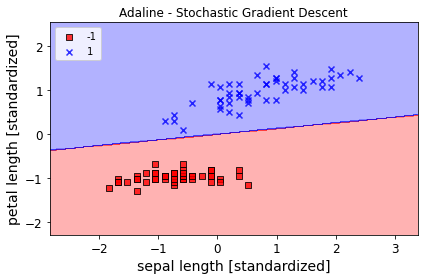

그림 저장: Average_Cost


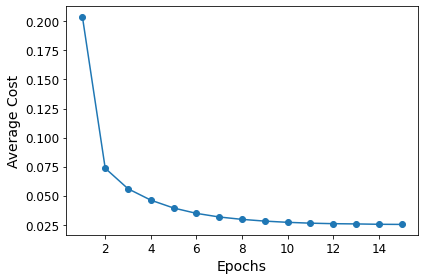

In [54]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
save_fig('Adaline_Stochastic_Gradient_Descent')
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
save_fig('Average_Cost')
plt.show()

여기서 보듯이 평균 비용이 상당히 빠르게 감소한다. 15번째 에포크 이후 최종 결정 경계는 배치 경사 하강법과 거의 비슷해 보인다. 스트리밍 데이터를 사용하는 온라인 학습 방식으로 모델을 훈련하려면 개개의 샘플마다 <code>partial_fit()</code>메서드를 호출하면 된다. 예를 들어 <code>ada.partial_fit(X_std[0, :], y[0])과 같다.

# 각주

<b id="p01">1</b> A Logical Calculus of the Ideas Immanent in Nervous Activity, W. S. McCulloch and W. Pitts, Bulletin of Mathematical Biophysics, 5(4): 115-113, 1943[↩](#a01)

<b id="p02">2</b> The Perceptron: A Perceiving and Recognizing Automaton, F.Rosenblatt, Cornell Aeronautical Laboratory, 1957[↩](#a02)

<b id="p03">3</b> 단위 계단 함수는 <i>z</i> ≥ 0일 때 1, 그렇지 않으면 0을 반환하는 함수이다.[↩](#a03)

<b id="p04">4</b> 입력과 가중치의 가중 합이 0인 식이 2차원이면 직선 방정식이 되지만, 3차원이면 평면 방정식이 되고 n차원이면 초평면<sup>hyperplane</sup> 방정식이된다. 이들은 모두 공간을 둘로 나눈다는 특징이 있다.[↩](#a04)

<b id="p05">5</b> 환원주의는 복잡하고 추상적인 개념을 더 단순한 요소로 명확하게 정의할 수 있다는 믿음이다. 예를 들어 생물의 어떤 현상을 물리적, 화학적으로 설명할 수 있다록 주장한다.[↩](#a05)

<b id="p06">6</b> iris.data 파일은 iris-setosa, iris-versicolor, iris-virginica가 순서대로 50개씩 들어 있는 CSV 파일이다.[↩](#a06)

<b id="p07">7</b> An Adpative "Adaline" Neuron Using Chemical "Memistors", Technical Report Number 1553-2, B. Widrow and others, Stanford Electron Labs, Standford, CA, October 1960[↩](#a07)

<b id="p08">8</b> <i>w<sub>0</sub></i>에 대한 그래디언트는 <i>x<sub>0</sub></i>가 1이므로 SSE 비용 함수의 편도 함수에서 오차의 합만 남는다.[↩](#a08)